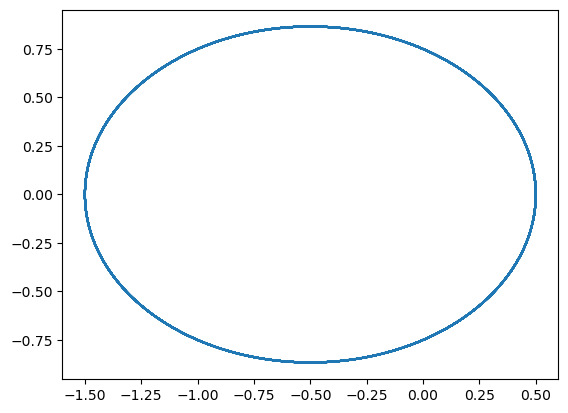

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def compute_derivatives(x, y, u, v):
    #derivativesはk1,k2,k3,k4のリスト
    derivatives = []
    r = np.sqrt(x**2+y**2)
    derivatives.append(u)
    derivatives.append(v)
    derivatives.append(-x/(pow(r, 3)))
    derivatives.append(-y/(pow(r, 3)))
    return derivatives

def main():
    e = 0.5 #離心率
    h = 0.01 #ステップサイズ
    nstep = 10000 #ステップ数
    X = [] #変数を格納するリスト(x,y,u,v)
    ##グラフ
    x = [] #変数を格納するリスト(x(t))
    y = [] #変数を格納するリスト(y(t))
    
    #初期条件
    X.append(1-e) #x(0)
    X.append(0) #y(0)
    X.append(0) #u(0)
    X.append(np.sqrt((1 + e)/ (1 -e))) #v(0)
    
    for i in range(nstep):
        k1 = compute_derivatives(*X) #リストをアンパックして引数に渡す
        temp = [X[j] + h * k1[j] / 2 for j in range(4)] #リスト内包表記
        k2 = compute_derivatives(*temp)
        temp = [X[j] + h * k2[j] / 2 for j in range(4)]
        k3 = compute_derivatives(*temp)
        temp = [X[j] + h * k3[j] for j in range(4)]
        k4 = compute_derivatives(*temp)
        
        #変数更新
        for j in range(4):
            X[j] += h * (k1[j] + 2 * k2[j] + 2 * k3[j] + k4[j] )/6
            
        x.append(X[0])
        y.append(X[1])
        
    plt.plot(x,y)
    plt.show()

if __name__ == '__main__':
    main()